# PREDICTION OF DODGECOIN PRICE MOVEMENT USING MACHINE LEARNING
This project focuses on developing a Dogecoin price movement prediction system using machine learning techniques. Although cryptocurrencies like Bitcoin and Ethereum dominate the market, Dogecoin  inspired by the “doge” meme  has gained popularity through online communities and celebrity endorsements. Despite the volatility of cryptocurrencies and unclear regulations in India, their features such as fast transfers, anonymity, and low transaction costs have driven adoption. The project aims to use historical Dogecoin data and market indicators to train a model capable of predicting future price movements.


## Library Section

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

## Data Laoding

In [2]:
dataset = pd.read_csv("DOGE-USD (3).csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [4]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2646,08-11-2025,0.178674,0.183009,0.173312,0.176182,0.176182,2.236138e+09
2647,09-11-2025,0.176182,0.180964,0.171679,0.179260,0.179260,1.608941e+09
2648,10-11-2025,0.179259,0.185019,0.177660,0.181814,0.181814,2.127004e+09
2649,11-11-2025,0.181813,0.185346,0.171870,0.172025,0.172025,2.107396e+09
2650,12-11-2025,0.172020,0.178284,0.167481,0.170081,0.170081,1.803938e+09


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2651 non-null   object 
 1   Open       2650 non-null   float64
 2   High       2650 non-null   float64
 3   Low        2650 non-null   float64
 4   Close      2650 non-null   float64
 5   Adj Close  2650 non-null   float64
 6   Volume     2650 non-null   float64
dtypes: float64(6), object(1)
memory usage: 145.1+ KB


In [6]:
dataset.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6.259550e+06
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4.246520e+06
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2.231080e+06
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3.288960e+06
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2.481270e+06
...,...,...,...,...,...,...,...
2646,08-11-2025,0.178674,0.183009,0.173312,0.176182,0.176182,2.236138e+09
2647,09-11-2025,0.176182,0.180964,0.171679,0.179260,0.179260,1.608941e+09
2648,10-11-2025,0.179259,0.185019,0.177660,0.181814,0.181814,2.127004e+09
2649,11-11-2025,0.181813,0.185346,0.171870,0.172025,0.172025,2.107396e+09


## Data Preparation

In [10]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='mixed', dayfirst=True, errors='coerce')
dataset = dataset.sort_values('Date')
dataset.set_index('Date', inplace=True)
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6.259550e+06
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4.246520e+06
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2.231080e+06
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3.288960e+06
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2.481270e+06
...,...,...,...,...,...,...
2025-11-08,0.178674,0.183009,0.173312,0.176182,0.176182,2.236138e+09
2025-11-09,0.176182,0.180964,0.171679,0.179260,0.179260,1.608941e+09
2025-11-10,0.179259,0.185019,0.177660,0.181814,0.181814,2.127004e+09


##  Data Featuring & Visualizing Time Series Trend

### Plot Closing Price Overtime
The closing price represents the final price at which Dogecoin was traded on each day.It helps visualize the overall price movement and detect long-term upward or downward trends.The closing price is often used as the target variable in prediction models. By studying its trend, the model learns how historical price patterns influence future values.

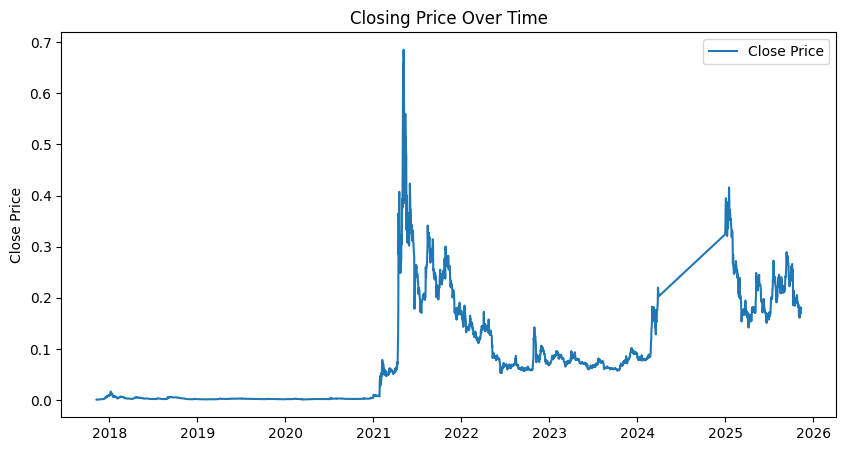

In [11]:
plt.figure(figsize=(10,5))
plt.plot(dataset['Close'], label='Close Price')
plt.title('Closing Price Over Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Daily Return Over Time
Daily return measures the percentage change in closing price from one day to the next.It highlights volatility how much the price fluctuates daily.Understanding daily returns helps in predicting price direction (up/down movement) rather than just absolute price. It can also help identify periods of high market activity or risk.


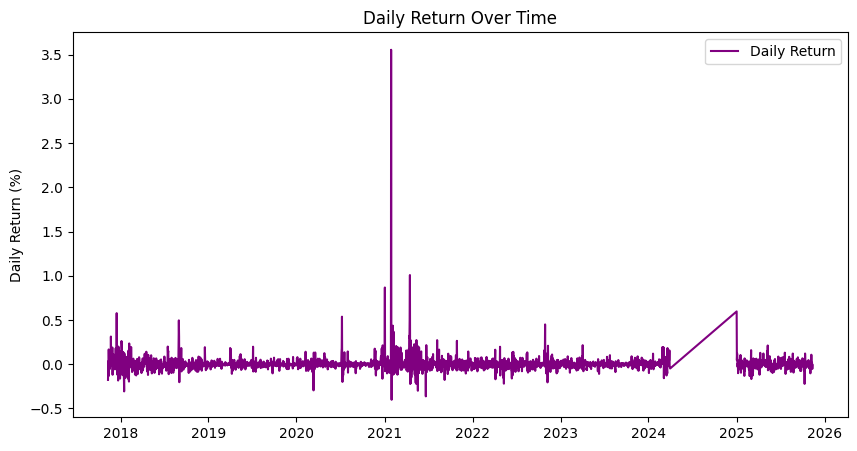

In [12]:
dataset['Daily Return'] = dataset['Close'].pct_change()   # Calculate daily percentage change

plt.figure(figsize=(10,5))
plt.plot(dataset['Daily Return'], label='Daily Return', color='purple')
plt.title('Daily Return Over Time')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

### Return Distribution
A histogram showing how frequently certain daily return values occur (positive or negative).It reveals whether returns are normally distributed, skewed, or have heavy tails, which indicates market volatility and stability.The model can use this to understand the probability of large price changes. A wider distribution means more unpredictable movement, which informs model selection and risk estimation.

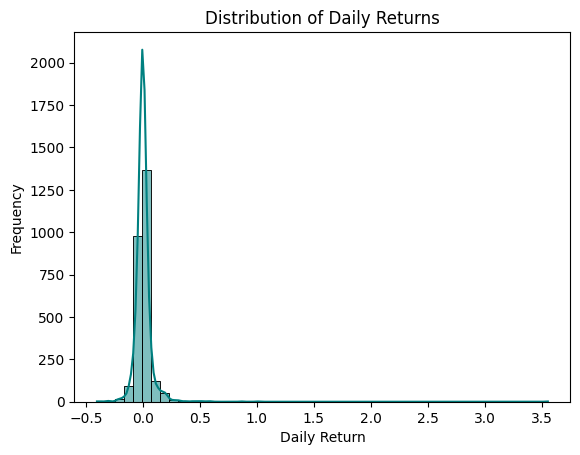

In [13]:
sns.histplot(dataset['Daily Return'].dropna(), bins=50, kde=True, color='teal')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### Moving Averages
A moving average (MA) smooths out price data by averaging it over a fixed window (e.g., 20 or 50 days).It helps identify trends and potential turning points in the price. The 20day MA captures short-term trends, while the 50-day MA represents medium-term movement.Moving averages are strong trend indicators that help the model understand momentum whether the market is trending up, down, or stabilizing.

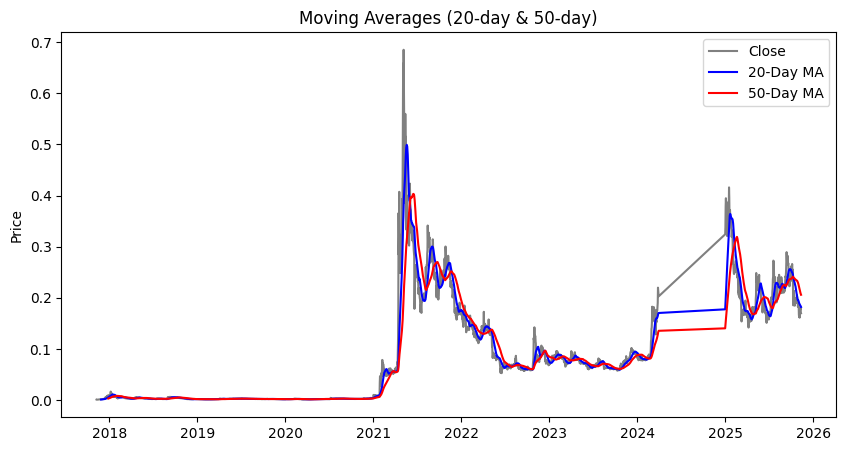

In [14]:
dataset['MA20'] = dataset['Close'].rolling(20).mean()   # 20-day moving average
dataset['MA50'] = dataset['Close'].rolling(50).mean()   # 50-day moving average

plt.figure(figsize=(10,5))
plt.plot(dataset['Close'], label='Close', color='gray')
plt.plot(dataset['MA20'], label='20-Day MA', color='blue')
plt.plot(dataset['MA50'], label='50-Day MA', color='red')
plt.title('Moving Averages (20-day & 50-day)')
plt.ylabel('Price')
plt.legend()
plt.show()

### Moving average of 7 days, It captures the weekly trend

In [15]:
dataset['MA7'] = dataset['Close'].rolling(7).mean()

## Volatility 
### 7-day rolling standard deviation of returns measures how unstable the price is 

In [16]:
dataset['Volatility'] = dataset['Daily Return'].rolling(7).std()

## Target Variable 

The goal of this project is to predict the price movement: whether it goes UP or DOWN in the next days.

In [17]:
dataset['Target'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)

In [18]:
dataset.dropna(inplace=True) # The last row will have no next-day, so there will be a null value 

In [19]:
dataset

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA20,MA50,MA7,Volatility,Target
Date,,,,,,,,,,,,
2017-12-28,0.008856,0.008856,0.007717,0.008486,0.008486,5.120150e+07,-0.043508,0.005895,0.003451,0.008228,0.136304,1
2017-12-29,0.008513,0.009477,0.008155,0.009391,0.009391,6.247490e+07,0.106646,0.006233,0.003610,0.008705,0.100659,0
2017-12-30,0.009365,0.009446,0.007388,0.007860,0.007860,5.617530e+07,-0.163028,0.006499,0.003744,0.008790,0.114633,1
2017-12-31,0.007803,0.009274,0.007669,0.008972,0.008972,6.225640e+07,0.141476,0.006808,0.003900,0.008846,0.105512,0
2018-01-01,0.009031,0.009063,0.008101,0.008909,0.008909,5.061690e+07,-0.007022,0.007088,0.004057,0.008843,0.104834,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-08,0.178674,0.183009,0.173312,0.176182,0.176182,2.236138e+09,-0.013942,0.186121,0.212254,0.171450,0.064414,1
2025-11-09,0.176182,0.180964,0.171679,0.179260,0.179260,1.608941e+09,0.017471,0.185078,0.210484,0.170406,0.065083,1
2025-11-10,0.179259,0.185019,0.177660,0.181814,0.181814,2.127004e+09,0.014247,0.184449,0.208897,0.172487,0.047985,0


## Features Selection

The goal of this project is to make it easy for non-traders; they should not input any values like close or daily return, etc. So we are going to use all the numerical features, like Daily Return, MA20, MA50, and MA7, which are generated entirely by the system.



In [20]:
features = ['Close', 'Daily Return', 'MA7', 'MA20', 'MA50', 'Volatility', 'Volume']
target = 'Target'
X = dataset[features]
y = dataset[target]



## Spliting for Train & Test

In [21]:
train_size = int(0.8 * len(dataset))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


## Model Training Using Random Forest Classifier 

In [22]:
# XGBoost Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.508637236084453

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.57      0.54       259
           1       0.51      0.45      0.48       262

    accuracy                           0.51       521
   macro avg       0.51      0.51      0.51       521
weighted avg       0.51      0.51      0.51       521



## Saving the Model

In [24]:
import joblib

joblib.dump(model, "doge_price_movement_model.pkl")


['doge_price_movement_model.pkl']

# Dogecoin Prediction System

In [30]:
import yfinance as yf
import numpy as np 

def get_latest_live_row():
    ticker = yf.Ticker("DOGE-USD")

    # Fetch the latest daily OHLCV data (last 1 day)
    df_live = ticker.history(period="1d")

    # Reset index to get Date column
    df_live = df_live.reset_index()

    # Rename columns to match your dataset structure
    df_live.rename(columns={
        "Date": "Date",
        "Open": "Open",
        "High": "High",
        "Low": "Low",
        "Close": "Close",
        "Volume": "Volume",
        "Adj Close": "Adj Close"
    }, inplace=True)

    return df_live.iloc[-1]   # return last row as a Series


In [34]:
def prepare_live_features(dataset, live_row):

    # Use only necessary columns
    temp = dataset[['Close', 'Volume']].copy()

    # Reset to simple integer index (fixes the Timestamp addition error)
    temp = temp.reset_index(drop=True)

    # Append live row
    temp.loc[len(temp)] = [live_row['Close'], live_row['Volume']]

    # Compute technical indicators
    temp['Daily Return'] = temp['Close'].pct_change()
    temp['MA7'] = temp['Close'].rolling(7).mean()
    temp['MA20'] = temp['Close'].rolling(20).mean()
    temp['MA50'] = temp['Close'].rolling(50).mean()
    temp['Volatility'] = temp['Daily Return'].rolling(7).std()

    # Return the newly created feature row (last row)
    latest_features = temp.tail(1)

    return latest_features


In [35]:
def predict_using_live_data(dataset, xgb_model):

    # Fetch latest row from yfinance
    live = get_latest_live_row()

    # Prepare the 7-day average features OR full indicators
    feature_row = prepare_live_features(dataset, live)

    # Filter feature columns matching your model
    feature_columns = ['Close', 'Daily Return', 'MA7', 'MA20', 'MA50', 'Volatility', 'Volume']
    X_input = feature_row[feature_columns].values.reshape(1, -1)

    # Handle missing values (first days will be NaN)
    X_input = np.nan_to_num(X_input)

    # Predict
    prediction = xgb_model.predict(X_input)[0]

    if prediction == 1:
        return "📈 LIVE Forecast: Dogecoin likely to go **UP** tomorrow!"
    else:
        return "📉 LIVE Forecast: Dogecoin likely to go **DOWN** tomorrow."


In [36]:
result = predict_using_live_data(dataset, xgb_model)
print(result)


📉 LIVE Forecast: Dogecoin likely to go **DOWN** tomorrow.
